In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import numpy as np 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Data-Science-Specialization/main/Week%20-12/TED%20Talk%20-%20Correlation%20from%20Scratch/TED_Preprocessed.csv')

In [3]:
del df['video_link']
del df['date_month_year']
df.head()

,duration,title,views,likes,comments,date,month,year,day
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu


## 1.Finding correlation from scratch


In [4]:
factor = []

for i in df.values:    
    factor.append(round(i[4]/i[2],5))          # i[2] = Views, i[4] = Comments
    
df['view_to_comments'] = factor

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.00243
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.00237


In [5]:
print("Minimum : ", min(df['view_to_comments']))
print("Maximum : ", max(df['view_to_comments']))

print(df['view_to_comments'].mode())

Minimum :  4e-05
Maximum :  0.05427
0    0.00137
Name: view_to_comments, dtype: float64


## 2. Adding predicted comments column 


In [6]:
comments = []

for i in df['views']:
    comments.append(int(i * .00137))
    
df['pred_comments'] = comments

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,70
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,35
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,29
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.00243,4945
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.00237,6035


### 6) correlation between comments and views 

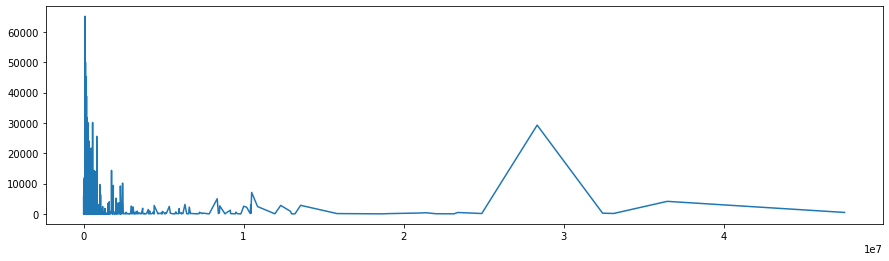

In [7]:
data = []
for i in df.values:
    data.append([i[2],i[3]])
df_ = pd.DataFrame(data,columns =['views','comments'])
views = list(df_.sort_values(by='views')['views'])
likes = list(df_.sort_values(by='views')['comments'])
fig,axs = plt.subplots(figsize =(15,4))
axs.plot(views,comments)

plt.show()

In [8]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,70
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,35
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,29
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.00243,4945
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.00237,6035


In [9]:
# conclusion there is a positive correlation between likes and views 

### 8) correlation between views and [comments ,predicted comments ]

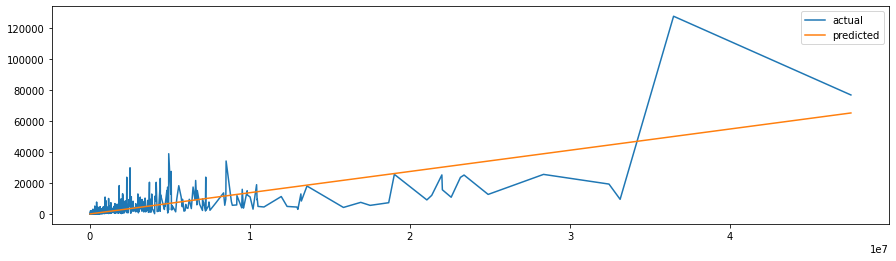

In [10]:
data = []
for i in df.values:
    data.append([i[2],i[4],i[10]])
df_ = pd.DataFrame(data,columns =['views','comments','pred_comments'])

views    = list(df_.sort_values(by='views')['views'])
comments = list(df_.sort_values(by='views')['comments'])
comments_ = list(df_.sort_values(by='views')['pred_comments'])

fig,axs = plt.subplots(figsize =(15,4))

plt.plot(views,comments,label ='actual')
plt.plot(views,comments_,label ='predicted')
plt.legend()
plt.show()

In [11]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,70
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,35
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,29
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.00243,4945
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.00237,6035


In [12]:
### finding loss using MSE (mean squared error )

In [13]:
# 9.1) finding mean- error

In [14]:
total_error = []
for i in df.values:
    t = (i[4]-i[10])
    if  t >= 0:
        total_error.append(t)
    else:
        total_error.append(-t)

sum(total_error)/len(total_error)

538.8514954486346

In [15]:
# 9.2 finding view to like ratio 

In [23]:
views_to_comments = []
for i in df.values:
    views_to_comments.append(round(i[4]/i[2],5))
    
df['view_to_comments'] = views_to_comments

st = int(df['view_to_comments'].min()*100000)
end =int(df['view_to_comments'].max()*100000)

factors = [] 

for i in range(st,end+1):
    factors.append(i/100000)


In [24]:
# 9.3 predicting likes for specific factor 

In [25]:
comments_ = []
for i in df['views']:
    comments_.append(int(i* 0.01388))


In [26]:
# combining factor +error +ratio 


In [36]:
likes = np.array(df['comments'])

error = []

for i in tqdm(range(st,end+1,1)):           # creating start and ending range for factor
    factor = i/100000                      
    
    comments_ = []
    
    for i in df['views']:                     #predicting likes for spcific factor 
        comments_.append(int(factor*i))
        
    comments_ = np.array(comments_)

    total_error = []                        # error for actual like to predicted like for the factor
    
    for i in range(len(comments)):
        l = comments[i]-comments_[i]
        if l>= 0:                          # finding the modulus 
            total_error.append(l)
        else:
            total_error.append(-l)
    total_error = np.array(total_error)
    
    error.append([factor, int(total_error.mean())])      # finding error for specific factor 
error = pd.DataFrame(error,columns=['Factor','Error'])

100%|█████████████████████████████████████████████████████████████████████████████| 5424/5424 [00:30<00:00, 175.63it/s]


In [37]:
error.head()

,Factor,Error
0,0.00004,817
1,0.00005,816
2,0.00006,816
3,0.00007,815
4,0.00008,816


In [38]:
## finding the best factor that find the likes and views 

In [39]:
final_factor = error.sort_values(by= 'Error').head(10)['Factor'].mean()

In [40]:
final_factor

8.5e-05

In [41]:
comments_ =[]
for i in df['views']:
    comments_.append(int(i*final_factor))
df['pred_comments'] = comments_
df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_comments,pred_comments
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.00511,4
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.00207,2
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.00187,1
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.00243,306
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.00237,374


In [42]:
# actual to predicted with best fit factor 

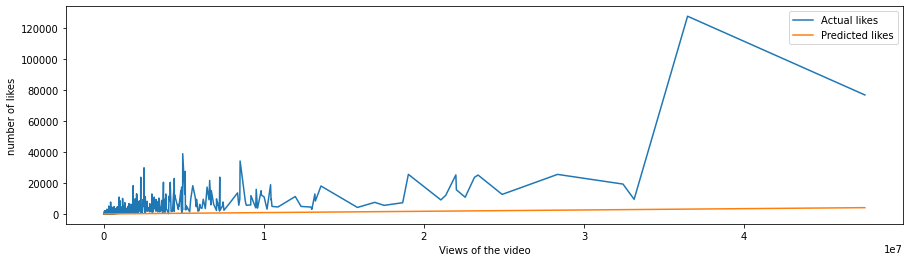

In [43]:
data = []

for i in df.values:
    data.append([i[2],i[4],i[10]])
    
df_ = pd.DataFrame(data,columns =['views','comments','pred_comments'])
views = list(df_.sort_values(by='views')['views'])
likes = list(df_.sort_values(by='views')['comments'])
likes_ = list(df_.sort_values(by='views')['pred_comments'])

fig,axs = plt.subplots(figsize =(15,4))

plt.plot(views,likes,label = 'Actual likes ')
plt.plot(views,likes_,label = 'Predicted likes')

plt.legend()

plt.xlabel('Views of the video')
plt.ylabel('number of likes')

plt.show()

In [ ]:
# assignment 
# correlation best fit line likes to comments ratio 
